# Cycling GPS Data

In this portfolio we are going to analyse some data collected from a portable GPS 
device during a number of cycling races. 

In [1]:
import pandas as pd
import utils
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Utility Function

`parse_gpx` in the utils module will read the XML data file and return a Pandas DataFrame.

In [2]:
df = utils.parse_gpx('data/ride1.gpx')
df.head()

,elevation,latitude,longitude
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589
2012-09-22 21:46:56,35.6,-33.899426,150.97589


## Distance and Speed Functions
All distance and speed related functions are put in a separate file called <b>DistanceFunc.py</b> to make this notebook clean and look neat. Open the file to know more about it.

Now, improting the function file `DistanceFunc` as `dst`

In [3]:
import DistanceFunc as dst

Using seaborn `lmplot` (Scatterplot) to map the race with latitude and longitude points

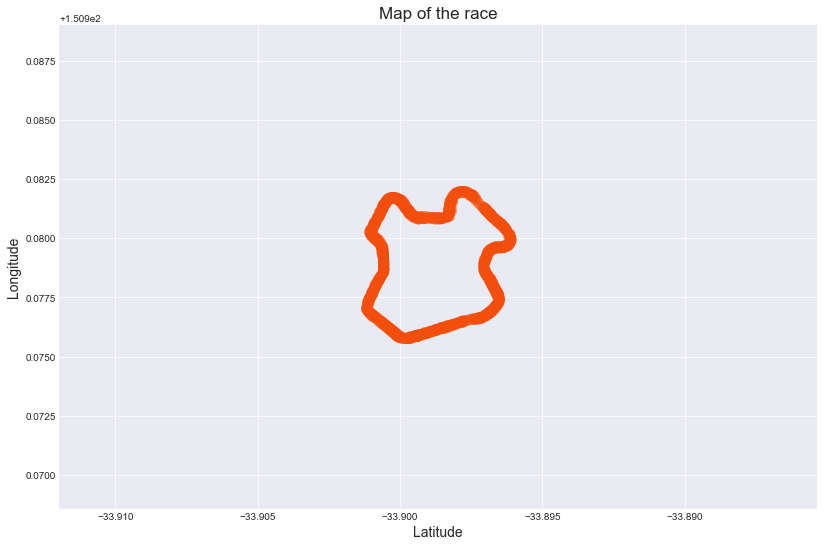

In [54]:
# Plotting the map with latitude and longitude points from DataFrame: df
g = sns.lmplot(data=df, x="latitude", y="longitude", fit_reg=False, 
           scatter_kws={"color":"#f74e0c","alpha":0.3,"s":100})
g.fig.set_figheight(8)
g.fig.set_figwidth(13)
sns.set_style("darkgrid")
ax = plt.gca()
ax.set_title("Map of the race", fontsize=17)
g.set_xlabels("Latitude",fontsize=14)
g.set_ylabels("Longitude",fontsize=14)
plt.show()

Creating a DataFrame `speed_df` with Distance and Speed from each points

In [5]:
# Getting column values from the main DataFrame df by calling speed_list function
speed_df = pd.DataFrame({'distance':[x for x, y in dst.speed_list(df)], 'speed':[y for x, y in dst.speed_list(df)]})
# Converting columns types to 'float64'
speed_df.distance = speed_df.distance.astype(str).astype('float64')
speed_df.speed = speed_df.speed.astype(str).astype('float64')

In [48]:
speed_df.shape

(1676, 2)

### <font color="#0d86c6">What is the average speed of the rider?</font>

In [7]:
print('Average Speed: ', speed_df.speed.mean())

Average Speed:  35.74533152468434


Creating speed plot

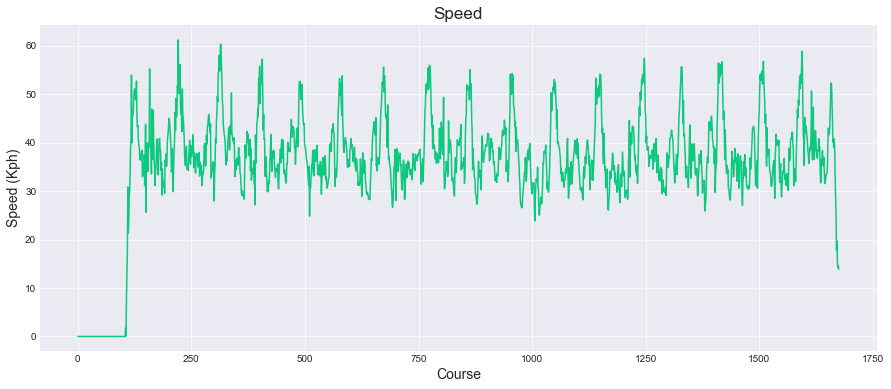

In [55]:
# Plotting speed
plt.figure(figsize=(15,6))
plt.title("Speed", fontsize=17)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Course', fontsize=14)
plt.ylabel('Speed (Kph)', fontsize=14)
speed_df.speed.plot(color="#0cc97d")
plt.show()

### <font color="#0d86c6">Plotting a histogram showing the distribution of speed over the course of the race</font>

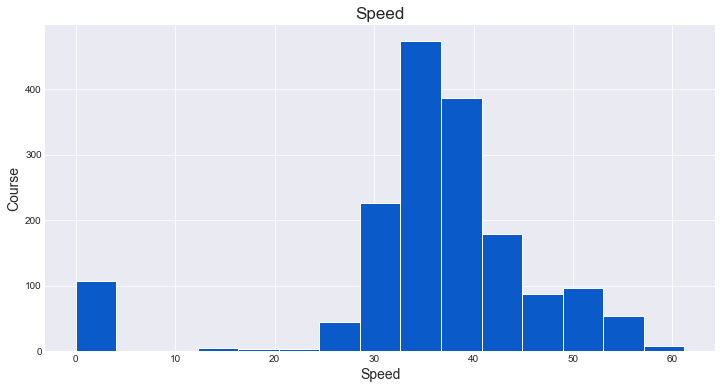

In [56]:
# Plotting histogram
plt.figure(figsize=(12,6))
plt.title("Speed", fontsize=17)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Course', fontsize=14)
speed_df.speed.hist(color="#0b5ac9", bins=15)
plt.show()

### <font color="#0d86c6">Plot speed vs gradient for the race</font>

Creating a DataFrame `speed_gradient` with column <b>speed</b> and <b>gradient</b> by calling `speed_df` function 

In [10]:
speed_gradient = pd.DataFrame({'speed': speed_df.speed, 'gradient': dst.gradient_list(df)})

Now plotting <b>speed vs gradient</b> figure with the `speed_gradient` DataFrame

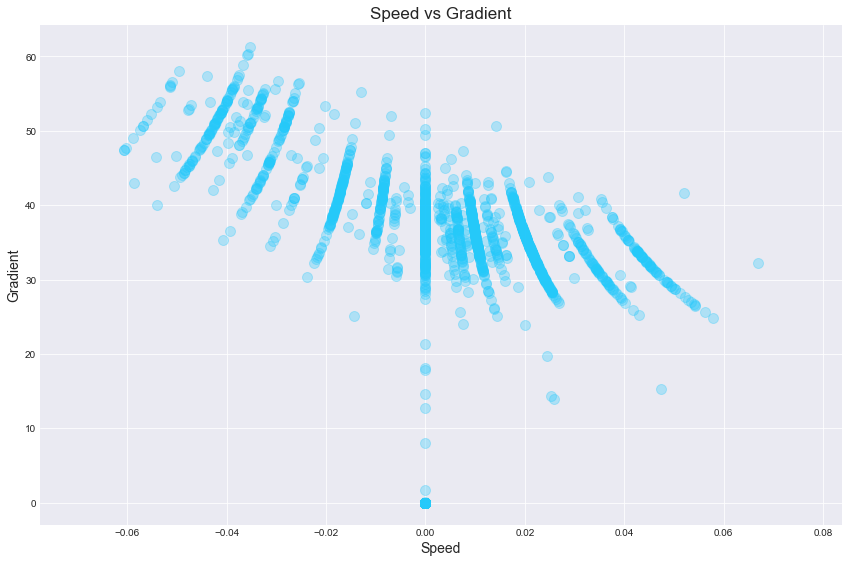

In [57]:
# Plotting speed vs gradient
g = sns.lmplot(data=speed_gradient, x="gradient", y="speed", fit_reg=False, 
           scatter_kws={"color":"#25c9fc","alpha":0.3,"s":100})
g.fig.set_figheight(8)
g.fig.set_figwidth(13)
sns.set_style("darkgrid")
ax = plt.gca()
ax.set_title("Speed vs Gradient", fontsize=17)
g.set_xlabels("Speed",fontsize=14)
g.set_ylabels("Gradient",fontsize=14)
plt.show()

<b>Comment:</b> It looks like speed gradually increases or decreases when gradient gradually increases or decreases.

### <font color="#0d86c6">How many laps did the rider complete in the race?</font>

In [53]:
# Calls lap_detector function from DistanceFunc file to calculate the number of laps. 
# Please open the DistanceFunc file for step by step comments
print ("Laps: ", dst.lap_detector(df))

Laps:  17


## Importing other race files

In [13]:
# All files
df2 = utils.parse_gpx('data/ride2.gpx')
df3 = utils.parse_gpx('data/ride3.gpx')
df4 = utils.parse_gpx('data/ride4.gpx')
df5 = utils.parse_gpx('data/ride5.gpx')
df6 = utils.parse_gpx('data/ride6.gpx')
df7 = utils.parse_gpx('data/ride7.gpx')
df8 = utils.parse_gpx('data/ride8.gpx')
df9 = utils.parse_gpx('data/ride9.gpx')

# List of files
files = [df, df2, df3, df4, df5, df6, df7, df8, df9]

### <font color="#0d86c6">Tabulating the average speeds of the races and the date of each race</font>

Creating a DataFrame `speedDate_df` with all race's average speed and date

In [14]:
speedDate_df = pd.DataFrame({'date':[date for speed, date in dst.speedDate(files)], 
                             'avg_speed':[speed for speed, date in dst.speedDate(files)]})
# Sorting by date
speedDate_df.sort_values(by='date', inplace=True)

The average speeds of the races and the date of each race sorted by date:

In [15]:
speedDate_df

,date,avg_speed
1,2011-08-27,37.145283
0,2012-09-22,35.745332
4,2012-12-29,34.774351
3,2013-09-28,38.097973
2,2014-12-27,38.239681
6,2016-04-02,38.251008
7,2017-02-18,35.847411
8,2017-08-19,34.494653
5,2017-09-02,36.732890


### <font color="#0d86c6">Plot speed vs date - does the cyclist get faster or slower?</font>

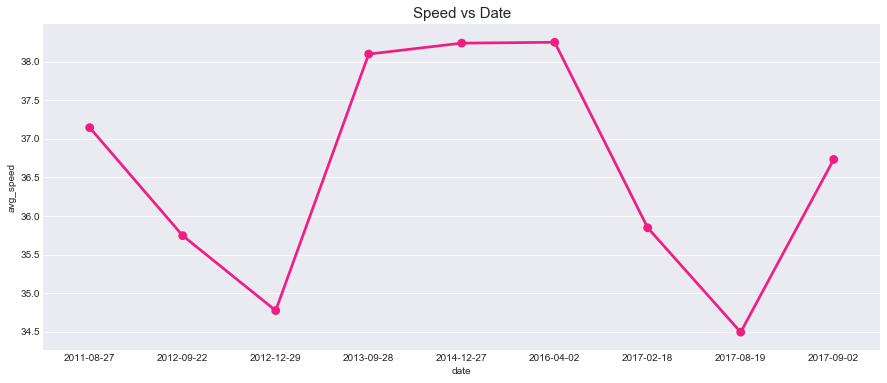

In [58]:
# Plotting speed vs date of the average speed
plt.figure(figsize=(15,6))
plt.title("Speed vs Date", fontsize=15)
sns.set_style("darkgrid")
sns.pointplot(x="date", y="avg_speed", data=speedDate_df, color="#ef1e7f")
plt.show()

<b>Comment:</b> From the plot we can clearly see that speed is fluctuating date to date. Maximum average speed was achieved on 02/04/2016 then the cyclist got slower. On 19/08/2017 cyclist achieved the minimum average speed then he/she got faster again.

Creating DataFrame `distWithTime_df` with <b>time</b> and <b>distance</b>

In [17]:
distWithTime_df = pd.DataFrame({'time':[time for time, dist in dst.distance_list_with_time(df)], 
                                'distance':[dist for time, dist in dst.distance_list_with_time(df)]})

Creating a list of DataFrames `lapWithTimeDFs_list` with lap times

In [18]:
lapWithTimeDFs_list = dst.lapWithTimeDFs(dst.distWithTimeDFs(files))

Creating a DataFrame `tabulateRacesLaps_df` to tabulate fastest and slowest lap times of each races

In [19]:
tabulateRacesLaps_df = pd.DataFrame({'race':[i for i in range(1, len(lapWithTimeDFs_list)+1)], 
                                     'fastest_lap':[dst.fastestAndSlowestLap(x)[0] for x in lapWithTimeDFs_list], 
                                     'slowest_lap':[dst.fastestAndSlowestLap(x)[1] for x in lapWithTimeDFs_list]})

### <font color="#0d86c6">For each race tabulate the fastest and slowest lap times</font>

In [20]:
tabulateRacesLaps_df

,race,fastest_lap,slowest_lap
0,1,00:02:59,00:03:45
1,2,00:03:07,00:03:24
2,3,00:03:11,00:13:12
3,4,00:03:01,00:09:47
4,5,00:02:51,00:04:39
5,6,00:03:04,00:03:53
6,7,00:03:04,00:12:54
7,8,00:03:06,00:04:06
8,9,00:03:18,00:03:42
